# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [34]:
def grafico_valor_activo(S0 = 100, mu = 0.02, sig = 0.07, dt = 0.001, Dt = 1, N = 10, graficar = True, pts = 0):
    tf = N*Dt + dt
    ts = np.arange(0, tf, dt)
    dws = np.array([np.random.normal(0, np.sqrt(dt)) for t in ts])
    
    Ss = np.zeros(len(ts))
    Ss[0] = S0
    
    # Calculo del valor de S para los tiempos t en ts
    for i in range(1, len(ts)):
        S = Ss[i-1]
        ti = ts[i]
        dS = S*(mu*dt + sig*dws[i-1])
        Ss[i] = S + dS 
    
    if not graficar:
        return ts, Ss
    
    figure = plt.figure()
    if pts == 0:
        plt.plot(ts, Ss)
        plt.show()
        return ts, Ss
    
    plotis = np.arange(0, pts)*(len(ts) - 1)//(pts - 1)
    plotTs = np.zeros(len(plotis))
    plotSs = np.zeros(len(plotis))
    
    for j in range(len(plotis)):
        i = plotis[j]
        plotTs[j] = ts[i]
        plotSs[j] = Ss[i]
    
    if graficar:
        figura = plt.figure()
        plt.plot(plotTs, plotSs)
        plt.show()
    
    return ts, Ss

In [26]:
def est_precis(ddt, mmu = 0.9, Ene = 48):
    start = time.time()
    ts, Ss = grafico_valor_activo(S0 = 1, mu = mmu, sig = 0, dt = ddt, Dt = 3, N = Ene, graficar = False)
    t = ts[-1]
    exCalc = Ss[-1]
    exReal = np.exp(mmu*t)
    error = np.abs(exCalc/exReal - 1)
    print("Para dt =", ddt, ", e**(", mmu, t, ") calculado:\t", exCalc)
    print("Para dt =", ddt, ", e**(", mmu, t, ") real:\t", exReal)
    print("Asi que, para dt =", ddt, " hubo un error de:", error*100, "%")
    print("Tiempo: ", time.time() - start, "\n")
est_precis(ddt = 0.0001)
est_precis(ddt = 0.0005)
est_precis(ddt = 0.001)
est_precis(ddt = 0.01)

Para dt = 0.0001 , e**( 0.9 144.0 ) calculado:	 1.9143978647135023e+56
Para dt = 0.0001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0001  hubo un error de: 0.5814679037944637 %
Tiempo:  6.77249550819397 

Para dt = 0.0005 , e**( 0.9 144.0 ) calculado:	 1.8702713688723112e+56
Para dt = 0.0005 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0005  hubo un error de: 2.8730455971999413 %
Tiempo:  1.4564614295959473 

Para dt = 0.001 , e**( 0.9 144.0 ) calculado:	 1.816569369920516e+56
Para dt = 0.001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.001  hubo un error de: 5.661898429115553 %
Tiempo:  0.7696371078491211 

Para dt = 0.01 , e**( 0.9 144.0 ) calculado:	 1.0784345960075816e+56
Para dt = 0.01 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.01  hubo un error de: 43.99472206218555 %
Tiempo:  0.0850527286529541 



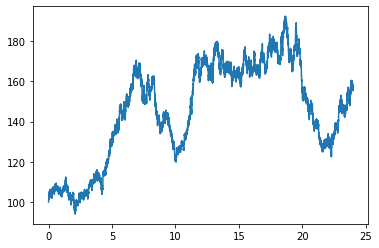

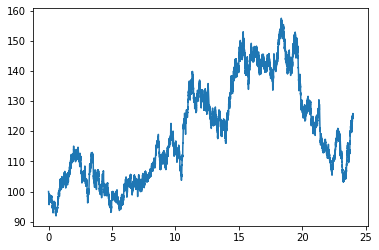

<Figure size 432x288 with 0 Axes>

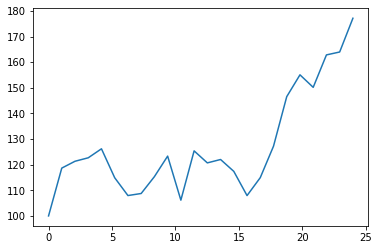

In [36]:
#_= grafico_valor_activo(mu = 0.001, sig = 0.5, Dt = 30, N = 120)
#_= grafico_valor_activo(sig = 0.5, Dt = 1, N = 120*30)
#_= grafico_valor_activo(sig = 0.5, Dt = 30, N = 120)
#_= grafico_valor_activo(sig = 0.5, Dt = 1, N = 120*30)

# Mes
_= grafico_valor_activo(mu = 0.031, sig = np.sqrt(0.008), Dt = 1, N = 24) # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = np.sqrt(0.008), Dt = 1, N = 24)
_= grafico_valor_activo(mu = 0.031, sig = np.sqrt(0.008), Dt = 1, N = 24, pts = 24)